# NOAA National Data Buoy Center

<img style="float: right;" src="DataSetSources.png" width="500">

## Project Decription: Create a surf forecast model using NOAA buoy data

## Links to Data:

### [Edisto Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41004)

### [ENE Nassau Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41047)

### Team Members:

### [*Jill Sirignano*](https://github.com/sirignanoj)

### [*Evan Tanner*](https://github.com/surfevant)

### [*Alex Swanson*](https://github.com/EyYoTony)

In [1]:
#import Libraries
import os
import pandas as pd
from IPython.display import display, HTML

#will have to change depending on relative os path
os.chdir('/home/loki/Desktop/Final_Project/Data-Mining-Project/DataSets')

#dataframes for feature extraction (need to clean)
nsTemp = pd.read_csv('formatted_Edisto.csv')
osTemp = pd.read_csv('formatted_Bahamas.csv')

#dropping TIDE and VIS_MI 99 values
nsDf = nsTemp.drop(columns=['VIS_mi','TIDE_ft'])
osDf = osTemp.drop(columns=['VIS_mi','TIDE_ft'])

##changing 99 value errors to NaNs (in case of more 99
#nsDf = nsTemp = nsTemp.replace({99: None})
#osDf = osTemp = osTemp.replace({99: None})

In [2]:
#check data was loaded for both sets
display(nsDf.head(3))
display(osDf.head(3))

,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,18,4.9,7.3,1.25,10.81,5.21,85,1027.7,11.3,23.4,3.5
1,2015,1,1,0,50,17,5.1,7.2,1.21,6.25,5.09,69,1027.9,11.4,23.2,3.3
2,2015,1,1,1,50,2,5.0,6.6,1.21,10.81,5.39,76,1028.2,11.3,22.9,1.8


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,97,1.8,2.7,1.24,8.33,5.75,4,1022.1,23.6,25.4,19.6
1,2015,1,1,0,50,94,1.6,2.3,1.29,7.14,5.89,100,1022.2,23.8,25.4,19.9
2,2015,1,1,1,50,168,0.1,0.4,1.22,8.33,5.96,11,1022.4,23.9,25.4,19.6


In [19]:
#dimensions of Dataframes
print("Nearshore: " + str(nsDf.shape))
print("Offshore: "+ str(osDf.shape))

#data typessame for nearshore and offshore
print("\n Data Types:\n")
nsDf.dtypes

Nearshore: (8743, 16)
Offshore: (8728, 16)

 Data Types:



#YY            int64
MM             int64
DD             int64
hh             int64
mm             int64
WDIR_degt      int64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt       int64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

In [4]:
#remove unnecessary data
nsStats = nsDf.drop(columns=['#YY','MM', 'DD','hh','mm'])
osStats = osDf.drop(columns=['#YY','MM', 'DD','hh','mm'])

#output of dataframe statistics
print("Nearshore Dataframe Stats:")
display(nsStats.describe())
print("Offshore Dataframe Stats:")
display(osStats.describe())

Nearshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000
mean,158.365206,6.806394,8.361867,1.399766,7.371066,5.182882,126.059362,1017.591799,22.001258,24.907400,17.513965
std,103.593976,3.155170,3.781697,2.635908,3.128800,2.591002,66.251417,5.922055,5.791476,15.083056,19.548702
min,1.000000,0.000000,0.100000,0.270000,2.740000,3.000000,1.000000,996.100000,-1.000000,13.400000,-9.100000
25%,54.000000,4.500000,5.600000,0.880000,5.560000,4.490000,86.000000,1013.700000,19.200000,21.900000,13.500000
50%,177.000000,6.600000,8.000000,1.170000,7.140000,5.000000,116.000000,1017.300000,23.400000,24.900000,19.300000
75%,235.000000,8.900000,10.900000,1.620000,9.090000,5.640000,149.000000,1021.300000,26.600000,27.700000,22.700000
max,360.000000,17.800000,22.800000,99.000000,99.000000,99.000000,999.000000,1034.700000,29.600000,999.000000,999.000000


Offshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000
mean,151.511572,5.674026,7.025103,1.726394,8.909504,6.241897,115.788726,1019.219833,25.628002,26.969386,21.074106
std,86.054642,3.298177,3.853836,3.232846,3.458431,3.126214,90.311844,96.239800,18.256630,20.947752,23.705128
min,1.000000,0.000000,0.100000,0.450000,3.570000,4.000000,1.000000,986.300000,16.400000,21.900000,6.100000
25%,86.000000,3.600000,4.600000,1.080000,7.690000,5.470000,60.000000,1015.800000,23.500000,24.700000,18.700000
50%,140.000000,5.500000,6.700000,1.430000,8.330000,6.050000,100.000000,1018.400000,25.100000,25.900000,21.500000
75%,208.000000,7.500000,9.100000,1.970000,10.000000,6.700000,128.000000,1021.200000,28.000000,28.900000,23.300000
max,999.000000,99.000000,99.000000,99.000000,99.000000,99.000000,999.000000,9999.000000,999.000000,999.000000,999.000000


In [5]:
#Most frequent wave height (not  mean value) below a feet lol
print('Nearshore Wave height Mean')
display(nsDf['WVHT_m'].mean())

#Most frequent wave height (not  mean value) 3.33 feet
print('Offshore Wave height Mean')
display(osDf['WVHT_m'].mean())

Nearshore Wave height Mean


1.3997655267070799

Offshore Wave height Mean


1.7263943629697527

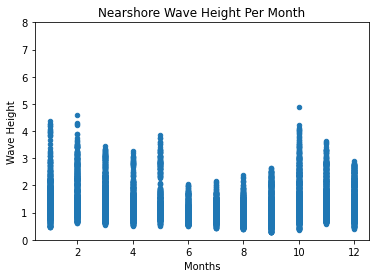

In [6]:
#the wave height for months in the year (nearshore)
import matplotlib.pyplot as plt
nsDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8))
plt.title('Nearshore Wave Height Per Month')
plt.xlabel('Months')
plt.ylabel('Wave Height')
plt.show()

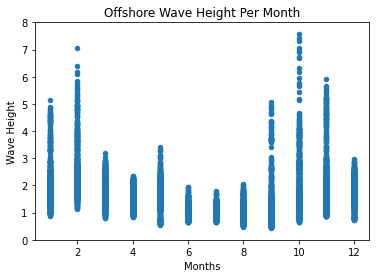

In [7]:
#the wave height for months in the year (offshore)
import matplotlib.pyplot as plt
osDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8))
plt.title('Offshore Wave Height Per Month')
plt.xlabel('Months')
plt.ylabel('Wave Height')
plt.show()

In [8]:
#returns the row(s) of largest wave height in nearshore data
print("Max Wave Height in Nearshore:")
nsMax = nsDf[nsDf['WVHT_m'] < 99]
display(nsMax[nsMax['WVHT_m']== nsMax['WVHT_m'].max()])

#returns the row of largest wave height in offshore data
print("Max Wave Height in Offshore:")
osMax = osDf[osDf['WVHT_m'] < 99]
display(osMax[osMax['WVHT_m'] == osMax['WVHT_m'].max()])

Max Wave Height in Nearshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6618,2015,10,4,5,50,135,10.8,13.1,4.87,10.0,7.76,89,999.8,24.7,27.2,23.7


Max Wave Height in Offshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6590,2015,10,3,18,50,70,19.3,25.0,7.56,9.09,9.0,120,986.9,27.1,28.8,23.8


In [16]:
#returns the row(s) of smallest wave height in nearshore data ( < 99 )
print("Smallest Wave Height in Offshore:")
osMin = osDf[osDf['WVHT_m'] < 99]
display(osMin[osMin['WVHT_m'] == osMin['WVHT_m'].min()])

#returns the row(s) of smallest wave height in nearshore data
print("Smallest Wave(s) Height in Nearshore:")
nsMin = nsDf[nsDf['WVHT_m'] < 99]
nsMin[nsMin['WVHT_m' ] == nsMin['WVHT_m'].min()]

Smallest Wave Height in Offshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5944,2015,9,6,17,50,320,0.4,0.9,0.45,8.33,5.77,111,1015.4,28.4,30.9,21.9


Smallest Wave(s) Height in Nearshore:


,#YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5921,2015,9,5,2,50,37,2.5,3.3,0.27,6.25,4.94,115,1015.7,27.9,29.2,24.0
5924,2015,9,5,5,50,21,1.4,2.1,0.27,11.43,4.97,82,1015.1,27.7,29.2,23.0
5925,2015,9,5,6,50,29,1.9,2.8,0.27,11.43,5.79,86,1014.9,27.6,29.1,23.4
5926,2015,9,5,7,50,8,5.4,6.3,0.27,10.81,5.59,84,1015.3,27.6,29.0,23.5
